In [1]:
# import the modules
import numpy as np
import geopandas as gp
import pandas as pd
import os
import json
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# seed the random
myseed = np.random.seed(201510)
myseed

In [3]:
# load the data with GeoDataFrame
nrg = gp.GeoDataFrame.from_csv(os.getenv('PUI2015')+'/HW5/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')

In [4]:
# have a simple visual of the data
print nrg.columns
print nrg.describe()

Index([u'NYC Borough, Block, and Lot (BBL)', u'Co-reported BBL Status',
       u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')
       NYC Borough, Block, and Lot (BBL)     Zip Code  \
count      

In [5]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUI2015')+'/HW5/Manhattan/MNMapPLUTO.shp')
print bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x131c2aed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1292b48d0>]], dtype=object)

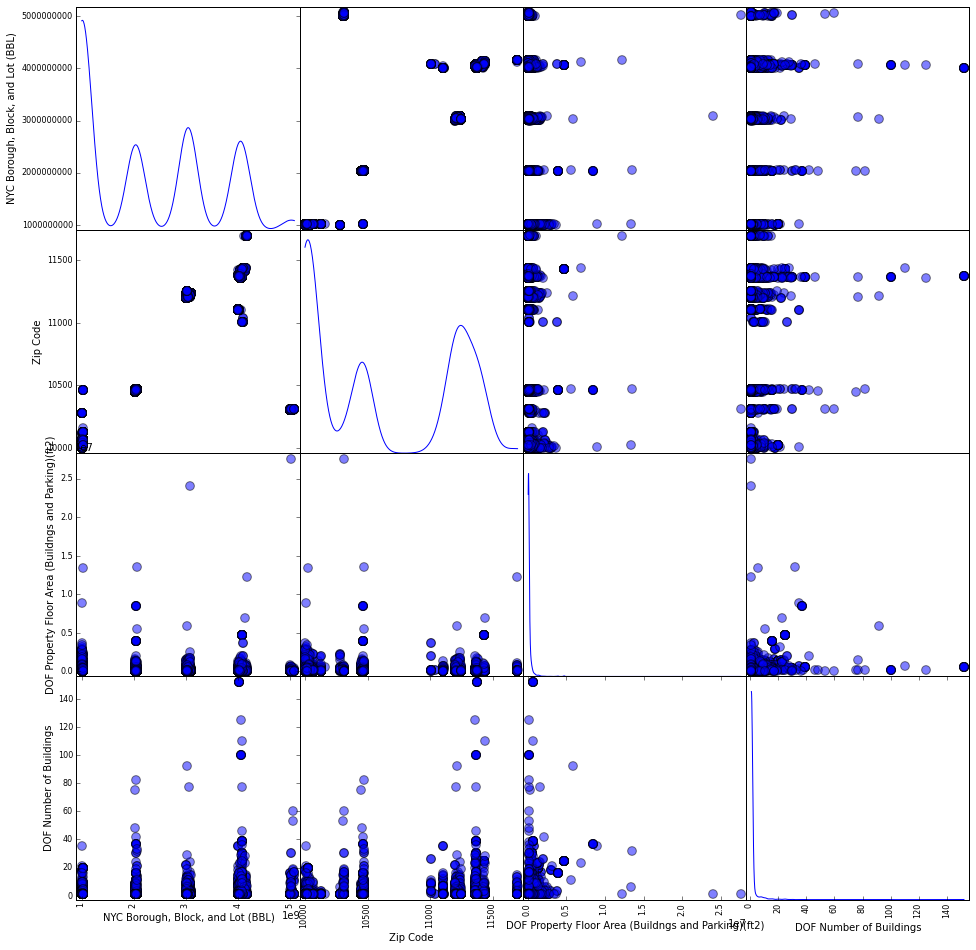

In [6]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16), diagonal='kde')

In [7]:
def canconvert(mydata):
    try :
        float(mydata)
        return True
    except ValueError:
        return False

Create the array here:

In [13]:
nrg['energy'] = nrg['Site EUI(kBtu/ft2)'].convert_objects(convert_numeric=True)
nrg['area'] = nrg['Reported Property Floor Area (Building(s)) (ft²)'].convert_objects(convert_numeric=True)

In [16]:
nrg.energy.astype(float)
nrg.area.astype(float)

Record Number
16099     91968
500      235370
5017      64806
5116      62839
363       98000
6876      53275
10714     61846
1214     204417
1544      60110
1905     457946
2301     511001
15059     56442
674       60939
2537      78435
2841      80293
2945     104990
15120    528180
3053     440895
4233      69656
4777      62300
4912      64838
5210      80917
5295      62205
1575     292061
15025     66000
4208     509100
4799      56170
1568      76430
5427      76992
5476      72000
          ...  
14559       NaN
14560       NaN
14748       NaN
14753       NaN
13582       NaN
13947       NaN
14777       NaN
14779       NaN
14409       NaN
13262       NaN
13261       NaN
12523       NaN
12529       NaN
12536       NaN
13929       NaN
13944       NaN
13945       NaN
13821       NaN
13829       NaN
13837       NaN
13838       NaN
13847       NaN
14352       NaN
12976       NaN
12978       NaN
12984       NaN
12987       NaN
12988       NaN
13472       NaN
13482       NaN
Name: area

In [18]:
nrg['BBL'] = nrg['NYC Borough, Block, and Lot (BBL)']

In [19]:
BBLmerge = pd.merge(nrg, bsize, on='BBL')

/Users/eliseowang/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1695: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target.values)
/Users/eliseowang/anaconda/lib/python2.7/site-packages/pandas/core/index.py:1049: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  return key in self._engine
